# Homework 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


These are suggested practice problems and are not to be submitted.

In [2]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Exercise 1

The symmetric random walk is the random walk that starts at $0$ whose up and down factors are $1$ and $-1$ respectively with probabilities $1/2$ for each.

Simulate the 252 step symmetric random walk 1,000 times and compare the distribution of end points with a normal distribution.

In [3]:
# write a function that designs a random walk by randomly selecting values from a set of numbers
def random_walk(n, steps, probs):
    """
    Simulate a random walk of length n using step values and their probabilities.

    Parameters:
        n: Number of steps in the walk.
        steps (array): Possible step values (e.g., [-1, 1]).
        probs (array): Corresponding probabilities for each step.

    Returns:
        np.ndarray: Array representing the random walk.
    """
    draws = np.random.choice(steps, size =n, p = probs)
    return np.cumsum(draws)

In [4]:
# define normal distribution for a given mean and standard deviation

def normal_distribution(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

In [5]:
# Simulate the 252 step random walk N times and store endpoints

N = 1000
endpoints = np.zeros(N)
symmetric_steps = [-1, 1]
symmetric_probs = [0.5, 0.5]

for i in range(N):
    endpoints[i] += random_walk(252, symmetric_steps, symmetric_probs)[-1]

Recall that $E[S_t] = t E[z_i]$ and $Var(S_t) = tVar(z_i)$ where $S_t$ is the endpoint of a $t$ step random walk with each step $z_i$. (See notes of [Lecture 3](https://github.com/TheErdosInstitute/quant-finance-summer-2025/blob/main/Lecture%203/3%20Random%20Walks.pdf) for derivations.) In case of symmetric random walk, we can easily compute $E[z_i] = 0$ and $Var(z_i)=1$. Hence,

$$ E[S_t] = 0 $$

and

$$ Var(S_t) = t. $$


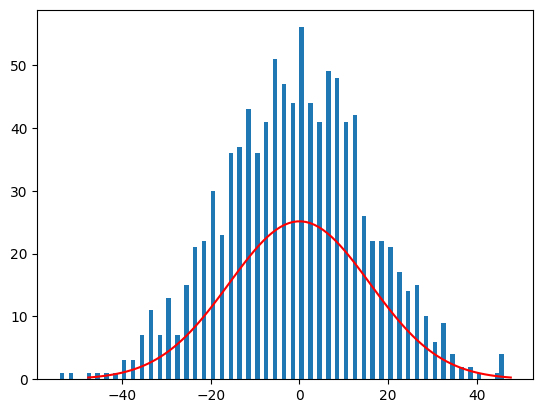

In [6]:
# plot the histogram of endpoints and the normal distribution function for N simulation with mu and sigma as above.

plt.hist(endpoints, bins = 100)

# following the above argument
mu = 0
variance = 252
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, N*normal_distribution(x, mu, sigma), c='r')
plt.plot()
plt.show()

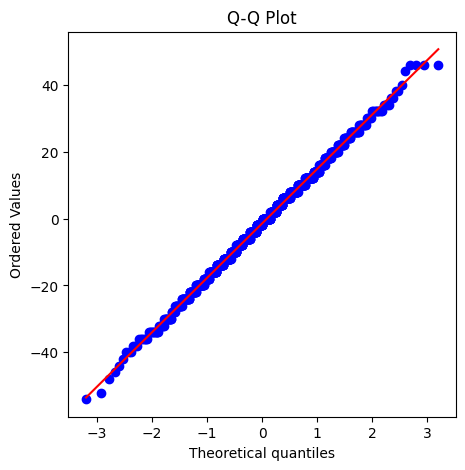

In [7]:
# Explore Q-Q Plot to compare the distibution of endpoints with normal distribution

plt.figure(figsize=(5, 5))
stats.probplot(endpoints, dist="norm", plot=plt)
plt.title('Q-Q Plot');

 The points are almost exactly on the 45-degree reference line in the Q-Q plot, therefore we can conlude with confidence that endpoints are normally distributed.

## Exercise 2

What is the expected number of steps needed in the symmetric random walk for the walk to reach a value of $10$?

Let $f(n)$ be the number of expected steps to reach 10 starting at $n$. Then we have $f(10)=0$ and want to find $f(0)$. For $n \\neq 10$, the walk can move to $n+1$ or $n_1$ with equal probabilities. Then we have the following recurrence equation:

$$

f(n) = 1 + \\frac{1}{2}f(n-1) + \\frac{1}{2}f(n+1).

$$

Arranging it, we obtain $f(n+1) - 2f(n) + f(n-1) = -2$. This is a second order non-homogenous linear recurrence and we know that its solution is as follows:

$$

f(n) = an^2 + bn + c.

$$

Plugging this back into the recurrence relation, we have $a=-1$. Finally, solving the system with the boundary condition $f(10)=0$ and assuming $f(10) = f(-10) = 0$ (symmetry), we find:

$$

f(0) = 10^2=100.

$$

In [8]:
# Using probabilistic method

def reach_10():
  walk = random_walk(300, symmetric_steps, symmetric_probs)
  for i in range(len(walk)):
    if walk[i] == 10:
      return i
  else: return 0

In [9]:
N = 1000
count_steps = np.zeros(N)

for i in range(N):
  step = reach_10()
  if step == 0:
    pass
  count_steps[i] += step

count_steps = count_steps[count_steps != 0]

print(count_steps.mean())
print(count_steps.std())

102.22935779816514
70.04371282939694


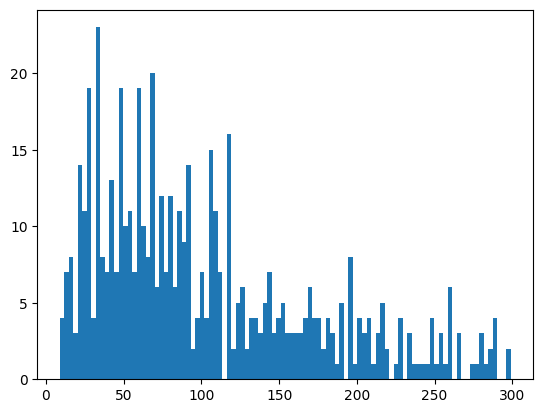

In [10]:
plt.hist(count_steps, bins = 100)
plt.show()

## Exercise 3

Prove the variance of the $n$-step symmetric walk is $n$.

Let $S_n = z_1 + \dots + z_n$ denote the $n$-step simple symmetric random. We can easily compute $E[z_i] = 0$ and $Var(z_i) = 1$ for all $i$. Using these together with the linearity of the expected value and the fact that $z_i$'s are independent; i.e. $E[z_iz_j] = E[z_i]E[z_j]$.

\begin{align}
Var(S_n) & = E[\big(S_n-E[S_n]\big)^2] = E[(z_1 + \dots z_n )^2] \\
 & = E\big[\sum_{i=1}^n z_i^2 - 2 \sum_{1 \leq i < j \leq 1} z_i z_j \big] \\
 & = nVar(z_1) + \sum_{1 \leq i < j \leq 1} E[ z_i z_j ] \\
 & = n + \sum_{1 \leq i < j \leq 1} E[ z_i]E[z_j] \\
 & = n.
\end{align}


In [18]:
# Probabilistic method

N = 1000
M = 100

# For n from 1 to N, consider random walks of n-step random walks and record their variance.

variances = np.zeros(int(N/10))

for i in np.arange(1,N,10):
    var = np.zeros(M)
    for k in range(M):
      walk = random_walk(i+1, symmetric_steps, symmetric_probs)
      var[k] = np.var(walk)
    j = int((i-1)/10)
    variances[j] = np.mean(var)


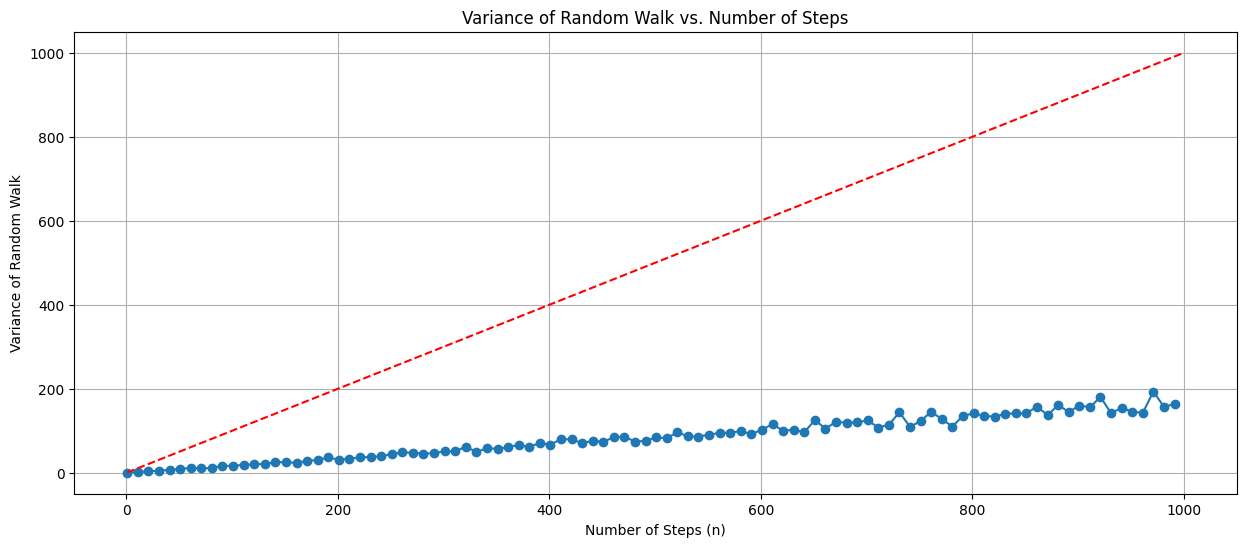

In [23]:
# Example data
N = 1000

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,N,10), variances, marker='o')  # Using index values on the x-axis
plt.plot(np.arange(1, N+1), np.arange(1, N+1), linestyle='--', color='r')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Variance of Random Walk')
plt.title('Variance of Random Walk vs. Number of Steps')
plt.grid(True)
plt.show()

## Exercise 4

Simulate an AR(1) random walk of the form  
$$
X_t = r_1 + r_2 + \cdots + r_t
$$  
where the increments $ r_t $ follow an AR(1) process given by  
$$
r_t = \mu + c(r_{t-1} - \mu) + \sigma z_t,
$$
and $z_t$ is the standard normal distribution.

- Simulate multiple paths of $ X_t $ for various values of the autocorrelation parameter $ c \in \{-0.9, -0.5, 0, 0.5, 0.9\} $.
- Set fixed values for $ \mu $ and $ \sigma $ (e.g., $ \mu = 0 $, $ \sigma = 1 $).
- Explore how the autocorrelation coefficient $c$ affects behavior of the random walk.

In [25]:
def ar_1_random_walk(n, c, mu, sigma):

  # Create an array of z_i's
  noise = np.random.normal(0, 1, n)

  # Create an array of zeros to be filled in by the random walk
  steps = np.zeros(n)

  # Initialize the first step
  steps[0] = mu + sigma*noise[0]

  # Fill in the rest of the steps
  for i in range(1,n):
    steps[i] = mu + c*(steps[i-1] - mu) + sigma*noise[i]

  return np.cumsum(steps)



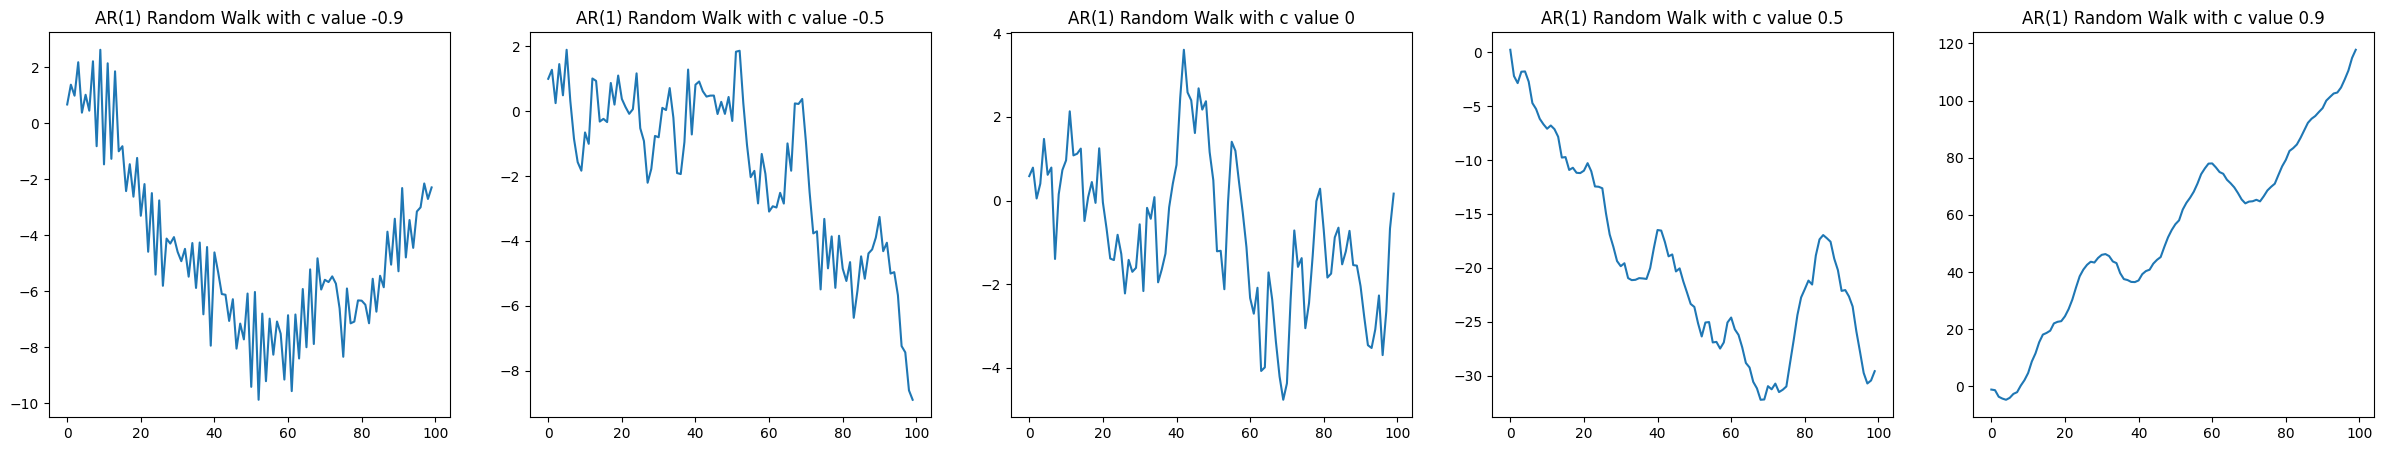

In [36]:
# Create an AR(1) walk
n = 100
mu = 0
sigma = 1
c = [-0.9, -0.5, 0, 0.5, 0.9]


fig, ax = plt.subplots(1,5,figsize=(30, 5))

for i in range(5):
  walk = ar_1_random_walk(n, c[i], mu, sigma)
  ax[i].plot(walk)
  ax[i].set_title(f"AR(1) Random Walk with c value {c[i]}")

plt.show()


## Exercise 5

Simulate a MA(1) random walk of the form  
$$
X_t = r_1 + r_2 + \cdots + r_t
$$  
where the increments $r_t$ follow an MA(1) process given by  
$$
r_t = \mu + \phi z_{t-1} + \sigma z_t
$$
and $z_t$ is the standard normal distribution.

- Simulate multiple paths of $X_t$ for various values of the moving average parameter $\phi \in \{-0.9, -0.5, 0, 0.5, 0.9\}$.
- Use fixed values for $\mu$ and $\sigma$ (e.g., $\mu = 0$, $\sigma = 1$).
- Explore how the moving average coefficient $\phi$ affects behavior of the random walk.


In [37]:
def ma_1_random_walk(n,phi, mu, sigma):

  # create an array of noise
  noise = np.random.normal(0,1,n)

  # create an array of zeros to be filled in by the random walk
  steps = np.zeros(n)

  # initialize the first step
  steps[0] = mu + sigma*noise[0]

  # fill in the rest of the walk
  for i in range(1,n):
    steps[i] = mu + phi*noise[i-1] + sigma*noise[i]

  return np.cumsum(steps)

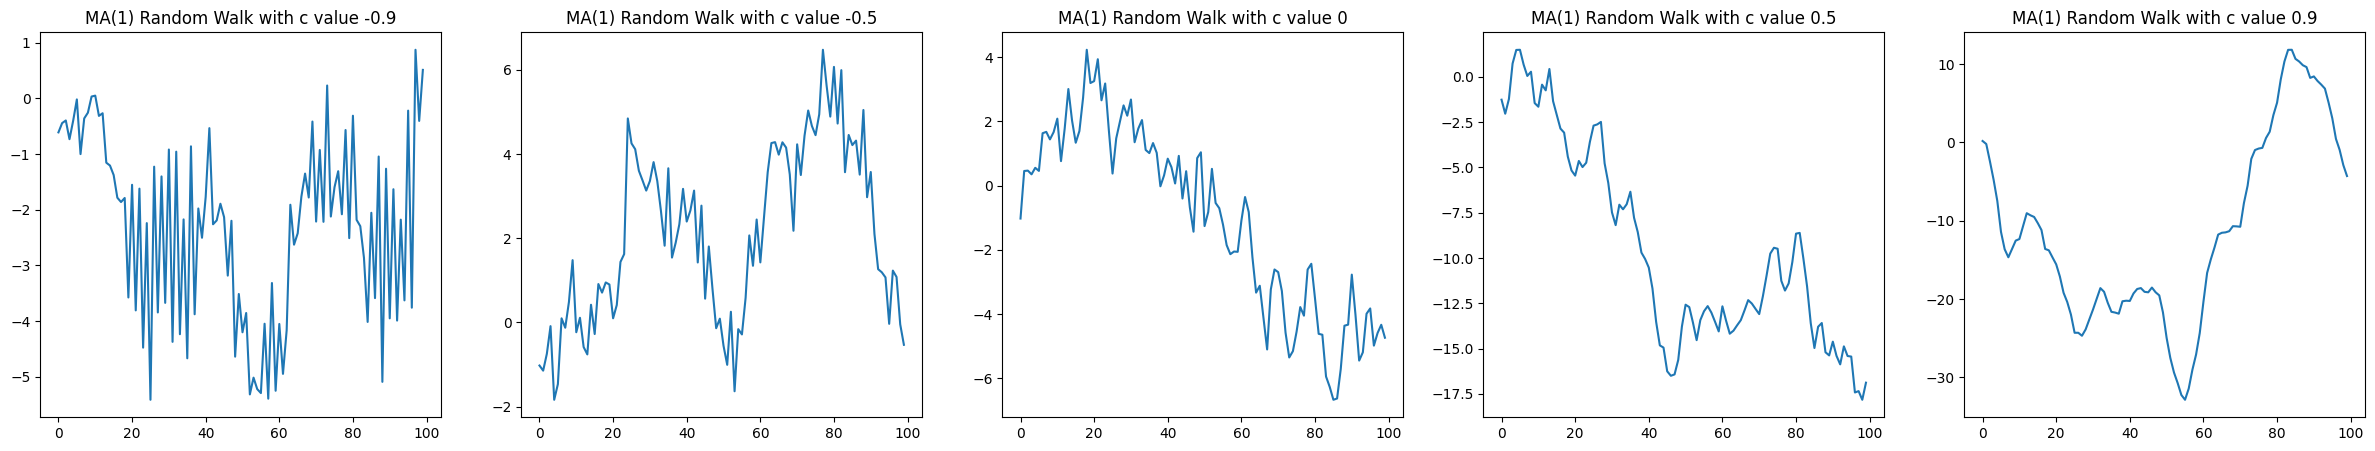

In [38]:
# Create an MA(1) walk
n = 100
mu = 0
sigma = 1
phi = [-0.9, -0.5, 0, 0.5, 0.9]


fig, ax = plt.subplots(1,5,figsize=(30, 5))

for i in range(5):
  walk = ar_1_random_walk(n, phi[i], mu, sigma)
  ax[i].plot(walk)
  ax[i].set_title(f"MA(1) Random Walk with c value {c[i]}")

plt.show()